# Семинар 3

Сегодня мы поговорим о:

- Задача регрессии
- Описание модели линейной регрессии и ее обучение
- Измерение ошибки в задаче регрессии
- Области применения линейной регрессии


- Задача классификации
- Описание модели линейной классификации и ее обучение
- Измерение ошибки в задаче классификации
- Области применения линейной классификации


- Проблема переобучения
- CookBook


---


Но поскольку сегодня первое занятие с элементами практики, то сначала стоит познакомиться с несколькими библиотеками.


# NUMPY

In [1]:
import numpy as np

np.zeros((3,3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

**Numpy** - библитоека для работы с многомерными массивами.

[Официальныый сайт](https://numpy.org/) библиотеки.

[Вводный курс](https://pythonworld.ru/numpy/1.html) в функционал библиотеки.

# Scipy

In [2]:
from scipy import interpolate

f = interpolate.interp1d([1,2,3], [1,-1,1])
f([1.5, 2.5])

array([0., 0.])

**Scipy** - библитоека для работы различных оптимизационных алгоритмов.

[Официальныый сайт](https://scipy.org) библиотеки.

[Вводный курс](https://docs.scipy.org/doc/scipy/reference/tutorial/) в функционал библиотеки.

# Pandas

In [3]:
import pandas as pd

IRIS_URL = "https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv"
df = pd.read_table(IRIS_URL, sep=',')
df.head()

sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa

**Pandas** - библитоека для работы с таблицами.

[Официальныый сайт](https://pandas.pydata.org/) библиотеки.

[Вводный курс](https://www.datacamp.com/community/tutorials/pandas-tutorial-dataframe-python) в функционал библиотеки.

# MatPlotLib

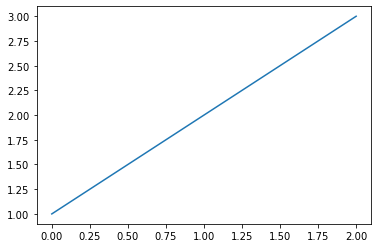

In [4]:
from matplotlib import pyplot as plt

plt.plot([1,2,3])

**Matplotlib** - библитоека для работы визуализации.

[Официальныый сайт](https://matplotlib.org/) библиотеки.

[Вводный курс](https://devpractice.ru/matplotlib-lesson-1-quick-start-guide/) в функционал библиотеки.



---
# Задача регрессии

## Немного из матстата и теорвера

**Регрессионный анализ** — метод моделирования измеряемых данных и исследования их свойств. Данные состоят из пар значений зависимой переменной (переменной отклика, целевой переменной) и независимой переменной (объясняющей, свободной переменной).

**Регрессия** — зависимость математического ожидания (например, среднего значения) случайной величины от одной или нескольких других случайных величин (свободных переменных). 

$E(y|x) = f(x)$ - услвоное матожидание\
$y = f(x)$ - функциональная зависимость

В общем виде задача заключается в поиске $f(x)$ описывающей зависимость $E(y|x) = f(x)$.\
Регрессия $y$ может быть записана $y = f(x) + v$, $v$ - случайная величина ошибки с нулевым матожидание и единичным стандартным отклонением.

## Алгоритмоческая постановка

- **$\chi$** — пространство объектов
- $Y$ — пространство ответов
- $x = (x^1, ..., x^d)$ — признаковое описание объекта
- X = $(x_i, y_i)^{n}_{i=1}$ — обучающая выборка
- $a(x)$ — алгоритм, модель
- $Q(a,$ X$)$ — функционал ошибки алгоритма a на выборке X
- Обучение: $a(x) = argmin_{a∈A} Q(a, $X$)$




---

# Линейная модель

в данном случае мы рассматриваем  линейный алгоритм, то есть

$a(x) = w_0 + \sum^d_{i=1}w_i*x^i$

Есои сделать ход конем и сказать сто у нас есть d+1 признак $x_{d+1} = 1$ являющийся константным для каждого объекта, то мы можем записать это так:

$a(x) = \sum^d_{i=0}w_i*x^i = \langle w,x\rangle$

Теперь поговорим о функционале ошибки.

$Q(a,$X$) = || a(x) - y ||$

где $|| a(x) - y ||$ является нормой, то есть может быть
- $| a(x) - y |$ - суммой модулей разности
- $(a(x) - y)^2$ - суммой квадратов разности

Чаще всего используют функционал под название "среднеквадратичная ошибка"
$Q(a,$X$) = \frac{1}{n}\sum^n_{i=1}(a(x_i) - y_i)^2$

Если вспомнить что такое a(x), то можно записать так:
$Q(w,$X$) = \frac{1}{n}\sum^n_{i=1}( \langle w,x_i\rangle - y_i)^2$

И задача обучения теперь сводится к поиску такого вектора $w$, что бы $w=argmin_w Q(w,$X$)$


Вспоминая, что множество объектов признаков $x_i$ образует матрицу $n \times d+1$, можно перейти к матричной записи.

$Q(w,$X$) = \frac{1}{n}||\langle w,X\rangle - y||$

In [5]:
# давайте соберем выборку X
# сгенерирована случайно
# 20 объектов
N = 20
# 1 признак описывает объект, 1 является правильным ответом
# это случай парной регрессии 

# наши признаки
np.random.seed(0)
x1 = np.random.rand(N)*10
x0 = np.full(N, 1)
X = np.stack([x0, x1]).T
# ошибка
eps = 1
e = np.random.uniform(-eps, eps, N)
# угловой коифицент прямой
B = 3
# ожидаемый результат
y = B*x1 + x0 + e
X, y

(array([[1.        , 5.48813504],
        [1.        , 7.15189366],
        [1.        , 6.02763376],
        [1.        , 5.44883183],
        [1.        , 4.23654799],
        [1.        , 6.45894113],
        [1.        , 4.37587211],
        [1.        , 8.91773001],
        [1.        , 9.63662761],
        [1.        , 3.83441519],
        [1.        , 7.91725038],
        [1.        , 5.2889492 ],
        [1.        , 5.68044561],
        [1.        , 9.25596638],
        [1.        , 0.71036058],
        [1.        , 0.871293  ],
        [1.        , 0.20218397],
        [1.        , 8.32619846],
        [1.        , 7.78156751],
        [1.        , 8.70012148]]),
 array([18.4216418 , 23.05399812, 19.00586001, 17.90755384, 12.94619283,
        20.65666543, 13.41432291, 28.64252786, 29.95357946, 12.33256944,
        24.28086237, 17.41531497, 17.9536375 , 28.90476705,  2.16866135,
         3.84914999,  1.83074337, 26.21246336, 25.23219869, 27.46400505]))

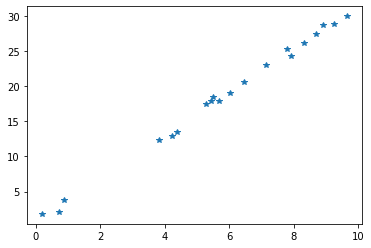

In [6]:
# давайте визуализируем  нашу выборку
 
plt.plot(x1,y, '*')

$y = X*w$\
$w = X^{-1}*y$


Аналитическое решение $w^∗ = (X^T X)^{−1}X^Ty$


In [7]:
# считаем w аналитическим методом
w = (np.linalg.inv(X.T@X)@X.T)@y
w

array([0.7148822 , 3.07235927])

Что думатете? Какие есть мысли и догадки? Что не так с этим методом?

Кроме аналитического метода обучения существуют и другие:
- Итеративный подход
- [Градиентный спуск](https://neurohive.io/ru/osnovy-data-science/gradient-descent/)
- Стохастический градиентный спуск

Давайте рассмотри хотя бы один из них.

In [8]:
def Q(w,X=X,y=y):
    return np.mean((X@w-y)**2)

def Q_gradient(w,X=X,y=y):
    return 2*np.mean(X.T@(X@w-y))

w0 = np.zeros(2)
while Q(w0) > 1.1:
    print(w0, Q(w0))
    w0 -= 1e-4*Q_gradient(w0)
print(w0, Q(w0))
Q(w), Q(w0)

[0. 0.] 417.41338809496193
[0.30007687 0.30007687] 332.235570987115
[0.56770665 0.56770665] 264.48228546247276
[0.80639783 0.80639783] 210.5890553322446
[1.01927952 1.01927952] 167.72057697906763
[1.20914247 1.20914247] 133.6215550448443
[1.37847568 1.37847568] 106.49805214625178
[1.52949903 1.52949903] 84.92311046877246
[1.66419233 1.66419233] 67.76168002496395
[1.78432135 1.78432135] 54.11090407940935
[1.89146091 1.89146091] 43.2526201778503
[1.98701555 1.98701555] 34.61557787658448
[2.07223794 2.07223794] 27.74538546034605
[2.1482453 2.1482453] 22.280604556213778
[2.21603405 2.21603405] 17.933734989710437
[2.27649284 2.27649284] 14.476089503153982
[2.33041427 2.33041427] 11.7257626005869
[2.37850522 2.37850522] 9.53806056450638
[2.42139614 2.42139614] 7.797889170988121
[2.45964929 2.45964929] 6.413698623611493
[2.49376615 2.49376615] 5.312667151318928
[2.52419399 2.52419399] 4.436869881010826
[2.55133168 2.55133168] 3.740231430629355
[2.575535 2.575535] 3.186101899740126
[2.59712123

(0.24884510801131648, 1.0867733874445205)

In [9]:
def Q(w,X=X,y=y):
    return np.mean((X@w-y)**2)

def Q_gradient(w,X=X,y=y):
    return 2*np.mean(X.T@(X@w-y))

w0 = np.zeros(2)
while Q(w0) > 1.1:
    print(w0, Q(w0))
    for i in range(X.shape[1]):
        x_i = X.copy()
        x_i[:, i]= 0
        w0 -= 1e-5*Q_gradient(w0,x_i)
print(w0, Q(w0))
Q(w), Q(w0)

[0. 0.] 417.41338809496193
[0.03000243 0.03000243] 408.4590193461737
[0.05975029 0.05975029] 399.67672561115626
[0.08924573 0.08924573] 391.06342297260323
[0.1184909 0.1184909] 382.6160811204146
[0.14748793 0.14748793] 374.3317224331526
[0.17623892 0.17623892] 366.2074210751272
[0.20474595 0.20474595] 358.2403021088453
[0.2330111 0.2330111] 350.42754062256506
[0.26103642 0.26103642] 342.766360872696
[0.28882394 0.28882394] 335.2540354407962
[0.31637568 0.31637568] 327.8878844049173
[0.34369365 0.34369365] 320.6652745250543
[0.37077982 0.37077982] 313.58361844246184
[0.39763617 0.39763617] 306.64037389259977
[0.42426463 0.42426463] 299.8330429314798
[0.45066716 0.45066716] 293.1591711751823
[0.47684565 0.47684565] 286.61634705232393
[0.50280202 0.50280202] 280.20220106925245
[0.52853815 0.52853815] 273.9144050877555
[0.55405591 0.55405591] 267.7506716150707
[0.57935715 0.57935715] 261.7087531059869
[0.60444371 0.60444371] 255.78644127683356
[0.6293174 0.6293174] 249.98156643115453
[0.65

(0.24884510801131648, 1.0983429501603719)

In [10]:
# опишем модель линейной регрессии:
class LinearRegression:
    def __init__(self, d):
        self.w0 = np.zeros(d)

    def Q(self, X, y):
        return np.mean((X@self.w0-y)**2)

    def Q_gradient(self, X, y):
        return 2*np.mean(X.T@(X@self.w0-y))

    def fit(self, X, y):
        while self.Q(X, y) > 1.1:
            for i in range(X.shape[1]):
                x_i = X.copy()
                x_i[:, i]= 0
                self.w0 -= 1e-5*self.Q_gradient(x_i, y)
    
    def predict(self, x):
        return x@self.w0

model = LinearRegression(2)
model.fit(X, y)
predict = model.predict(X)

predict, y

(array([17.77741994, 22.33610061, 19.25564061, 17.66972957, 14.34808495,
        20.43741815, 14.72983153, 27.17447312, 29.14424477, 13.24624541,
        24.43316975, 17.23165289, 18.30434883, 28.10123713,  4.68636952,
         5.1273226 ,  3.29397111, 25.55368305, 24.06140014, 26.57822811]),
 array([18.4216418 , 23.05399812, 19.00586001, 17.90755384, 12.94619283,
        20.65666543, 13.41432291, 28.64252786, 29.95357946, 12.33256944,
        24.28086237, 17.41531497, 17.9536375 , 28.90476705,  2.16866135,
         3.84914999,  1.83074337, 26.21246336, 25.23219869, 27.46400505]))



---

# Метрики

Есть несколько основных метрик:
- MSE $\frac{1}{n}\sum^n_{i=1}(pred_i-test_i)^2$
- RMSE $\sqrt{\frac{1}{n}\sum^n_{i=1}(pred_i-test_i)^2}$
- MAE $\frac{1}{n}\sum^n_{i=1}|pred_i-test_i|$
- MAPE $\frac{1}{n}\sum^n_{i=1}\frac{|pred_i-test_i|}{test_i} * 100\%$
- $R^2$ $1 - \frac{\sum(pred-test)^2}{{\sum(pred-mean\_test)^2}}$

In [11]:
# MSE
def MSE(pred, test):
    return np.mean((pred-test)**2)

MSE(predict, y)

1.0983429501603719

In [12]:
# RMSE
def RMSE(pred, test):
    return np.sqrt(np.mean((pred-test)**2))

RMSE(predict, y)

1.048018582927026

In [13]:
# MAE
def MAE(pred, test):
    return np.mean(np.abs(pred-test))

MAE(predict, y)

0.872105634843904

In [14]:
# MAPE
def MAPE(pred, test):
    return np.mean(np.abs(pred-test)/test)*100

MAPE(predict, y)

14.610346288166642

In [15]:
#R2
def R2(pred, test):
    mean_test = np.full_like(test, np.mean(test))
    return 1 - np.mean((pred - test)**2)/np.mean((pred - mean_test)**2)

R2(predict, y)

0.9807857087422674

А, ну и давайте визуализируем результат обучения модели

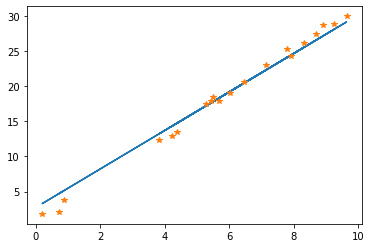

In [16]:
plt.plot(x1,predict)
plt.plot(x1,y, '*')



---
# Задача классификации
Теперь мы пытаемся разнести объекты разные классы.

Все точно также как и в задаче линейной регресси, только целевая перменная теперь отвечает за класс. 

Рассмотрим задачу бинарной классификации, когда у нас есть два класса.

$Y = \{-1, +1\}$

Виды классфикации:
- Двухклассовая классификация или бинарная. Наиболее простой в техническом отношении случай, который служит основой для решения более сложных задач.
- Многоклассовая классификация. Когда число классов достигает многих тысяч (например, при распознавании иероглифов или слитной речи), задача классификации становится существенно более трудной.
- Непересекающиеся классы.
- Пересекающиеся классы. Объект может относиться одновременно к нескольким классам.
- Нечеткие классы. Требуется определять степень принадлежности объекта каждому из классов, обычно это действительное число от 0 до 1.






---
# Линейная модель

На первом шаге задаем линейный алгоритм классифкации. Такой же как и в регрессии.

$a(x) = sign(\sum^d_{i=0}w_i*x_i) = sign(\langle w,x\rangle)$

Цель обучения заключается в разделении объектов гиперплоскостью $\langle w,x\rangle$ = 0$.

Расстояние от объекта $x$ до такой плоскости $\frac{\langle w,x\rangle}{||w||}$


Основываясь на расстоянии мы можем ввести понятие отступа $M_i = y_i \langle w,x_i\rangle$. Если $M_i$ больше 0, то классификатор дает верный ответ, если меньше, то он ошибается.


Введем функцию потерь:

$Q(a,$X$) = \frac{1}{n}\sum^n_{i=1}[a(x_i) \neq y_i] = \frac{1}{n}\sum^n_{i=1}[y_i \langle w,x_i\rangle$ < 0]

$Q(a,$X$)= \frac{1}{n}\sum^n_{i=1} [M_i<0]$

Видно, что такую функцию потерь сложно апроксимировать, поэтому давайте ее оценим сверху.

$[M_i<0] < L(M_i)$

Функцию $L$ можно задать несколькими способами:
 - $L(M) = log_2(1+exp(-M))$ - логистическая
 - $L(M) = exp(-M)$ - экспоненциальная
 - $L(M) = max(0, 1-M)$ - кусочно линейная

In [17]:
# на основе предыдущей выборки повторим наш эксперемент
# изменим целевую перемнную на z
z= np.full_like(y, -1)
z[y>5]=1
z

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1., -1., -1., -1.,  1.,  1.,  1.])

In [18]:
from scipy.optimize import minimize

def Q(w,X=X,y=z):
    return np.mean(np.log(1+np.exp(-y*(X@w))))

def Q_gradient(w,X=X,y=z):
    return -X.T@(1/(1+np.exp(y*(X@w)))-y)

w0 = np.full(2, 0.)
w0 = minimize(Q, w0, args=(X, z))
w0.x

array([-20.10020191,   7.851578  ])

In [19]:
# опишем модель линейной классифкации:
class LinearClassification:
    def __init__(self, d):
        self.w0 = np.zeros(d)

    def fit(self, X, y):
        self.w0 = minimize(Q, self.w0, args=(X, y)).x
  
    def predict(self, x):
        return np.sign(x@self.w0)

model = LinearClassification(2)
model.fit(X, z)
predict = model.predict(X)
predict, z, model.w0

(array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1., -1., -1., -1.,  1.,  1.,  1.]),
 array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1., -1., -1., -1.,  1.,  1.,  1.]),
 array([-20.10020191,   7.851578  ]))

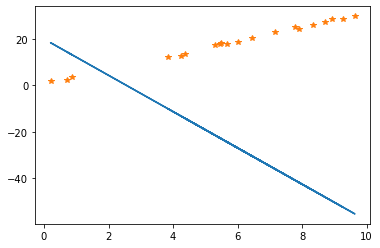

In [20]:
plt.plot(x1,-X@model.w0)
plt.plot(x1,y, '*')

# Метрики
 В основном метрики считаются на матрице ошибок

|TP|FP|\
|FN|TN|

У нас есть два класса 0 и 1, выберем базовый класс, например 1 и будем считать относительно него составляющие матрицы ошибок:
- TP  - если объект класса 1 и модель дала ему класс 1
- FP - если объект класс 0 и модель дала ему класс 1
- FN - если обхект класса 1 и модель дала ему клас 0
- TN - если объект класс 0 и модель дала ему класс 0

Есть несколько основных метрик:
- Accuracy - $\frac{TP+TN}{FP+NP+TP+TN}$
- Recall - $\frac{TP}{TP+FN}$
- Precisison - $\frac{TP}{TP+FP}$
- F1 - $\frac{2*recall*precision}{precision+recall}$

In [21]:
# accuracy

def accuracy(pred, test):
    return np.mean((pred==test)*1)

accuracy(predict, z)

1.0

In [22]:
# recall

def recall(pred, y_test, base=1):
    return np.sum(pred[y_test==base]==base)/np.sum(y_test==base)

recall(predict, z)

1.0

In [23]:
# precision

def precision(pred, y_test, base=1):
    return np.sum(pred[y_test==base]==base)/np.sum(pred==base)

precision(predict, z)

1.0

In [24]:
# F1

def f1(pred, y_test):
    return 2*recall(pred, y_test)*precision(pred, y_test)/(recall(pred, y_test)+precision(pred, y_test))

f1(predict, z)

1.0



---
# Проблема переобучение и регуляризация.

К сожалению даная проблема имеет место быть и среди линейных моделей. В чем ее суть? Да вот же.


(-5.0, 5.0)

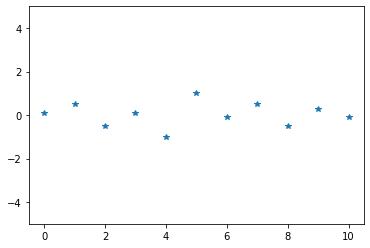

In [25]:
N = 10

# Есть некоторая выборка
x_values = np.arange(0, N+1)
y_values = np.array([0.1, 0.5 ,-0.5, 0.1, -1, 1, -0.1, 0.5, -0.5, 0.3, -0.1])

plt.plot(x_values, y_values, '*')
plt.ylim((-5, 5))

(-5.0, 5.0)

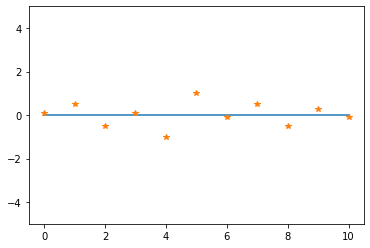

In [26]:
# Линейная регрессия получает в качестве результата линейную модель, 
# но а что если применить модели более высокого порядка? 
# Например полиномиальную регрессию?

plt.plot(np.zeros(N+1))
plt.plot(x_values, y_values, '*')
plt.ylim((-5, 5))

(-5.0, 5.0)

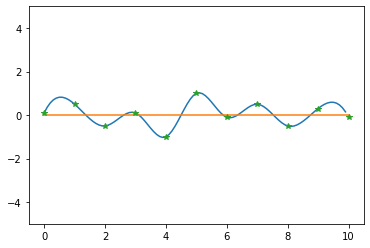

In [27]:
# Тогда мы рискуем просто проинтерполировать нашу выборку и получить модель,
# которая точно умеет работать только на данных обучения, а для новых объектов будет неверна

f = interpolate.interp1d(x_values,y_values,kind='cubic')
x_new = np.arange(0, N, 0.1)
plt.plot(x_new, f(x_new))
plt.plot(np.zeros(N+1))
plt.plot(x_values, y_values, '*')
plt.ylim((-5, 5))

Как понять что модель переобучилась:

- Отложенная выборка - часть исходной выборки, не участвующей в обучении.
- Кроссвалидация, более сложный вариант отложенной выборки.

Также у переобучения есть "синдромы":
- Черес чур большие веса
- Мультиколиниарность признаков $\langle w,x\rangle = 0, \forall x \in X$

Оба этих варианта буду лишь демонстрировать то, что модель переобучилась. Для борьбы с переобучением можно использовать регуляризацию.

Для применения регуляризации мы немного меняем наш функционал ошибки:

$Q(w, X )=\frac{1}{n}||⟨w,X⟩−y|| + \lambda * ||w||$

- $L1-регуляризация ||w||_1 = \sum^n_{i=1}|w_i|$
- $L2-регуляризация ||w||_2 = \sum^n_{i=1}w^2_i$

Суть регуляризации в том, что бы не дать коэфицентам черезмерно вырасти. За их рост мы начинаем штрафовать модель. Мы начинаем решать задачу с ограничениями.

$Q(w,X) -> min$\
$||w||<C$

Смысл регуляризации $||w||_2$ очень наглядно показывает такая картинка.

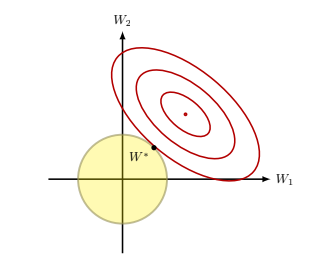

Геометрический смысл условной регуляризации. Красная точка — настоящий оптимум функции,
красные линии — линии уровня функции, черная точка — оптимум функции при введенном ограничении.

Таким образом, решение задачи с регуляризатором не будет характеризоваться слишком большими значениями весовых коэффициентов.


In [28]:
# Давайте регуляризуем нашу модель регрессии
class LinearRegressionL2:
    def __init__(self, d):
        self.w0 = np.zeros(d)

    def Q(self, X, y):
        return np.mean((X@self.w0-y)**2) + self.w0@self.w0

    def Q_gradient(self, X, y):
        return 2*np.mean(X.T@(X@self.w0-y)) + 2*self.w0

    def fit(self, X, y):
        while self.Q(X, y) > 18:
            for i in range(X.shape[1]):
                x_i = X.copy()
                x_i[:, i]= 0
                self.w0 -= 1e-5*self.Q_gradient(x_i, y)

    def predict(self, x):
        return x@self.w0

model = LinearRegressionL2(2)
model.fit(X, y)
predict = model.predict(X)
predict, y, model.w0

# TODO: регуляризовать модель классификации

(array([16.12147408, 20.25551898, 17.46200023, 16.02381495, 13.01157763,
        18.53369657, 13.35776497, 24.64320276, 26.42949249, 12.01237316,
        22.15724859, 15.62654459, 16.59932017, 25.48363979,  4.24983969,
         4.64971851,  2.98714155, 23.17338739, 21.82010889, 24.10249727]),
 array([18.4216418 , 23.05399812, 19.00586001, 17.90755384, 12.94619283,
        20.65666543, 13.41432291, 28.64252786, 29.95357946, 12.33256944,
        24.28086237, 17.41531497, 17.9536375 , 28.90476705,  2.16866135,
         3.84914999,  1.83074337, 26.21246336, 25.23219869, 27.46400505]),
 array([2.48476241, 2.48476241]))

In [29]:
RMSE(predict, y)

2.36453256538597



---

# CookBook

In [30]:
# датасет цен на дома в калифорнии
# на его примере покажем как готовить линейную регрессию
df = pd.read_table("https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv", sep=',')
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [31]:
# сначала оценим полноту данных и их типы
# можно заметить что есть несколько пропщенных значений total_bedrooms
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [32]:
# скорее всего это связано с тем, что этих данных нет или в домах нет спален о.О
df['total_bedrooms'].value_counts()

280.0     55
331.0     51
345.0     50
393.0     49
343.0     49
          ..
2111.0     1
1852.0     1
1663.0     1
1652.0     1
2479.0     1
Name: total_bedrooms, Length: 1923, dtype: int64

In [33]:
# давайте заполним пропуски нулем(или средним/медианнным знаечниями).
df['total_bedrooms'].fillna(0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [34]:
# вроде как все признаки у нас числовые, но есть один который состоит из слов
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [35]:
# его необхоимо перевести в числовое пространство
codes = {'<1H OCEAN': 1, 'INLAND': 2, 'NEAR OCEAN':3, 'NEAR BAY':4, 'ISLAND':5}
df['ocean_proximity'].replace(codes, inplace=True)
df.sample(5)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
16560    -121.37     37.77                19.0       2610.0           474.0   
17677    -121.85     37.33                16.0       2987.0           874.0   
2574     -124.13     40.78                34.0       2142.0           420.0   
8720     -118.35     33.83                36.0       1102.0           193.0   
18656    -121.97     36.97                15.0       2849.0           668.0   

       population  households  median_income  median_house_value  \
16560      1290.0       452.0         4.1298            222800.0   
17677      4241.0       841.0         2.8024            127900.0   
2574       1056.0       382.0         2.1101             86900.0   
8720        522.0       172.0         6.1187            342000.0   
18656      1546.0       582.0         2.7587            228600.0   

       ocean_proximity  
16560                2  
17677                1  
2574                 3  
8720                 1  
18656                3

In [36]:
# есть еще одна возможность кодировать признаки
pd.get_dummies(df['ocean_proximity'])

1  2  3  4  5
0      0  0  0  1  0
1      0  0  0  1  0
2      0  0  0  1  0
3      0  0  0  1  0
4      0  0  0  1  0
...   .. .. .. .. ..
20635  0  1  0  0  0
20636  0  1  0  0  0
20637  0  1  0  0  0
20638  0  1  0  0  0
20639  0  1  0  0  0

[20640 rows x 5 columns]

In [37]:
# давайте посчитаем различные статистические характеристики
df.describe().T

count           mean            std         min  \
longitude           20640.0    -119.569704       2.003532   -124.3500   
latitude            20640.0      35.631861       2.135952     32.5400   
housing_median_age  20640.0      28.639486      12.585558      1.0000   
total_rooms         20640.0    2635.763081    2181.615252      2.0000   
total_bedrooms      20640.0     532.476211     422.678333      0.0000   
population          20640.0    1425.476744    1132.462122      3.0000   
households          20640.0     499.539680     382.329753      1.0000   
median_income       20640.0       3.870671       1.899822      0.4999   
median_house_value  20640.0  206855.816909  115395.615874  14999.0000   
ocean_proximity     20640.0       1.908769       1.004549      1.0000   

                            25%          50%           75%          max  
longitude             -121.8000    -118.4900    -118.01000    -114.3100  
latitude                33.9300      34.2600      37.71000      41.9500  
housing_median_age      18.0000      29.0000      37.00000      52.0000  
total_rooms           1447.7500    2127.0000    3148.00000   39320.0000  
total_bedrooms         292.0000     431.0000     643.25000    6445.0000  
population             787.0000    1166.0000    1725.00000   35682.0000  
households             280.0000     409.0000     605.00000    6082.0000  
median_income            2.5634       3.5348       4.74325      15.0001  
median_house_value  119600.0000  179700.0000  264725.00000  500001.0000  
ocean_proximity          1.0000       2.0000       2.00000       5.0000

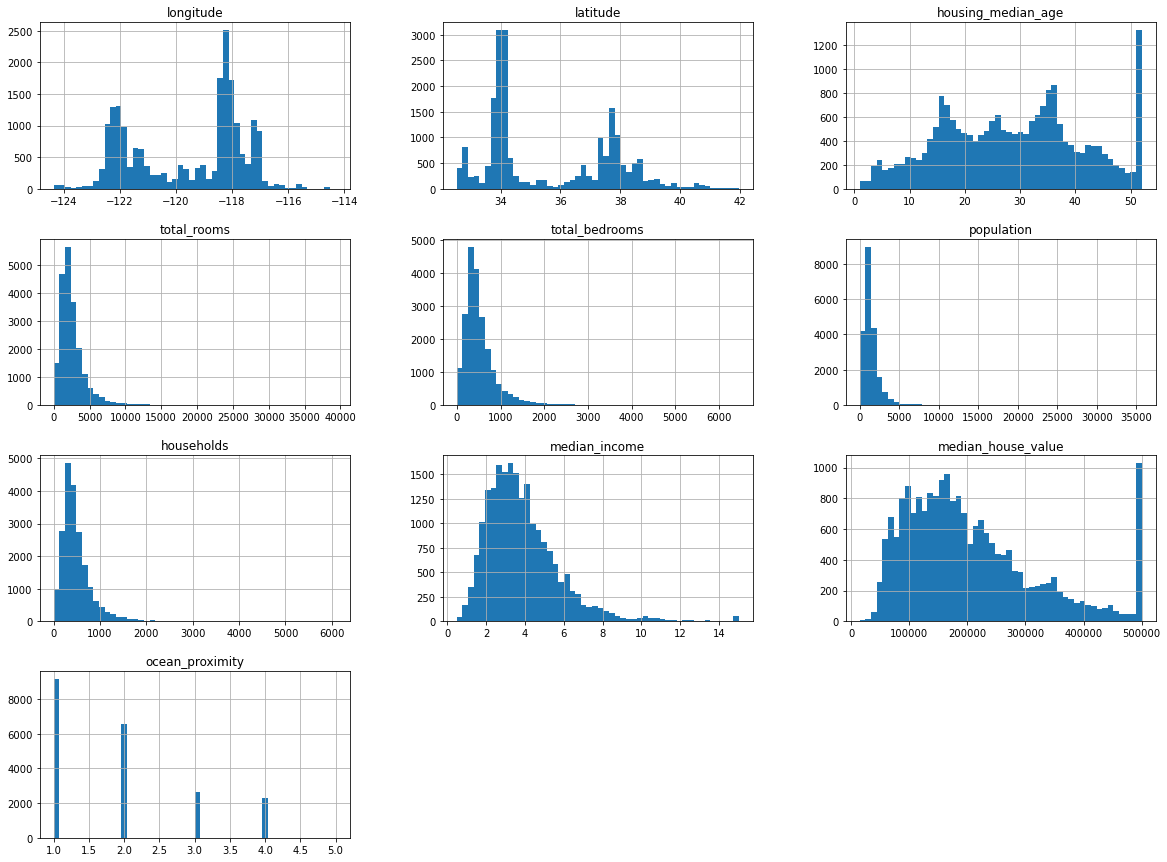

In [38]:
# давайте нарисуем гистограммы каждого признака что бы увидеть  распределение 
_ =df.hist(bins=50, figsize=(20,15))

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

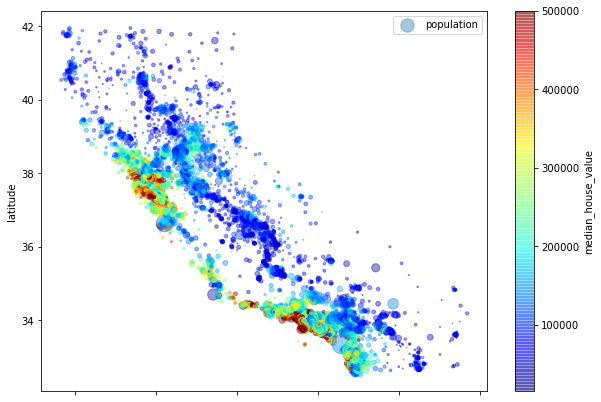

In [39]:
# давайте построим график зависимости местоположения дома, цены и популяции(колличества жиетелей в районе)
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
s=df["population"]/100, label="population", figsize=(10,7),
c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)

In [40]:
# построим матрицу корреляции
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

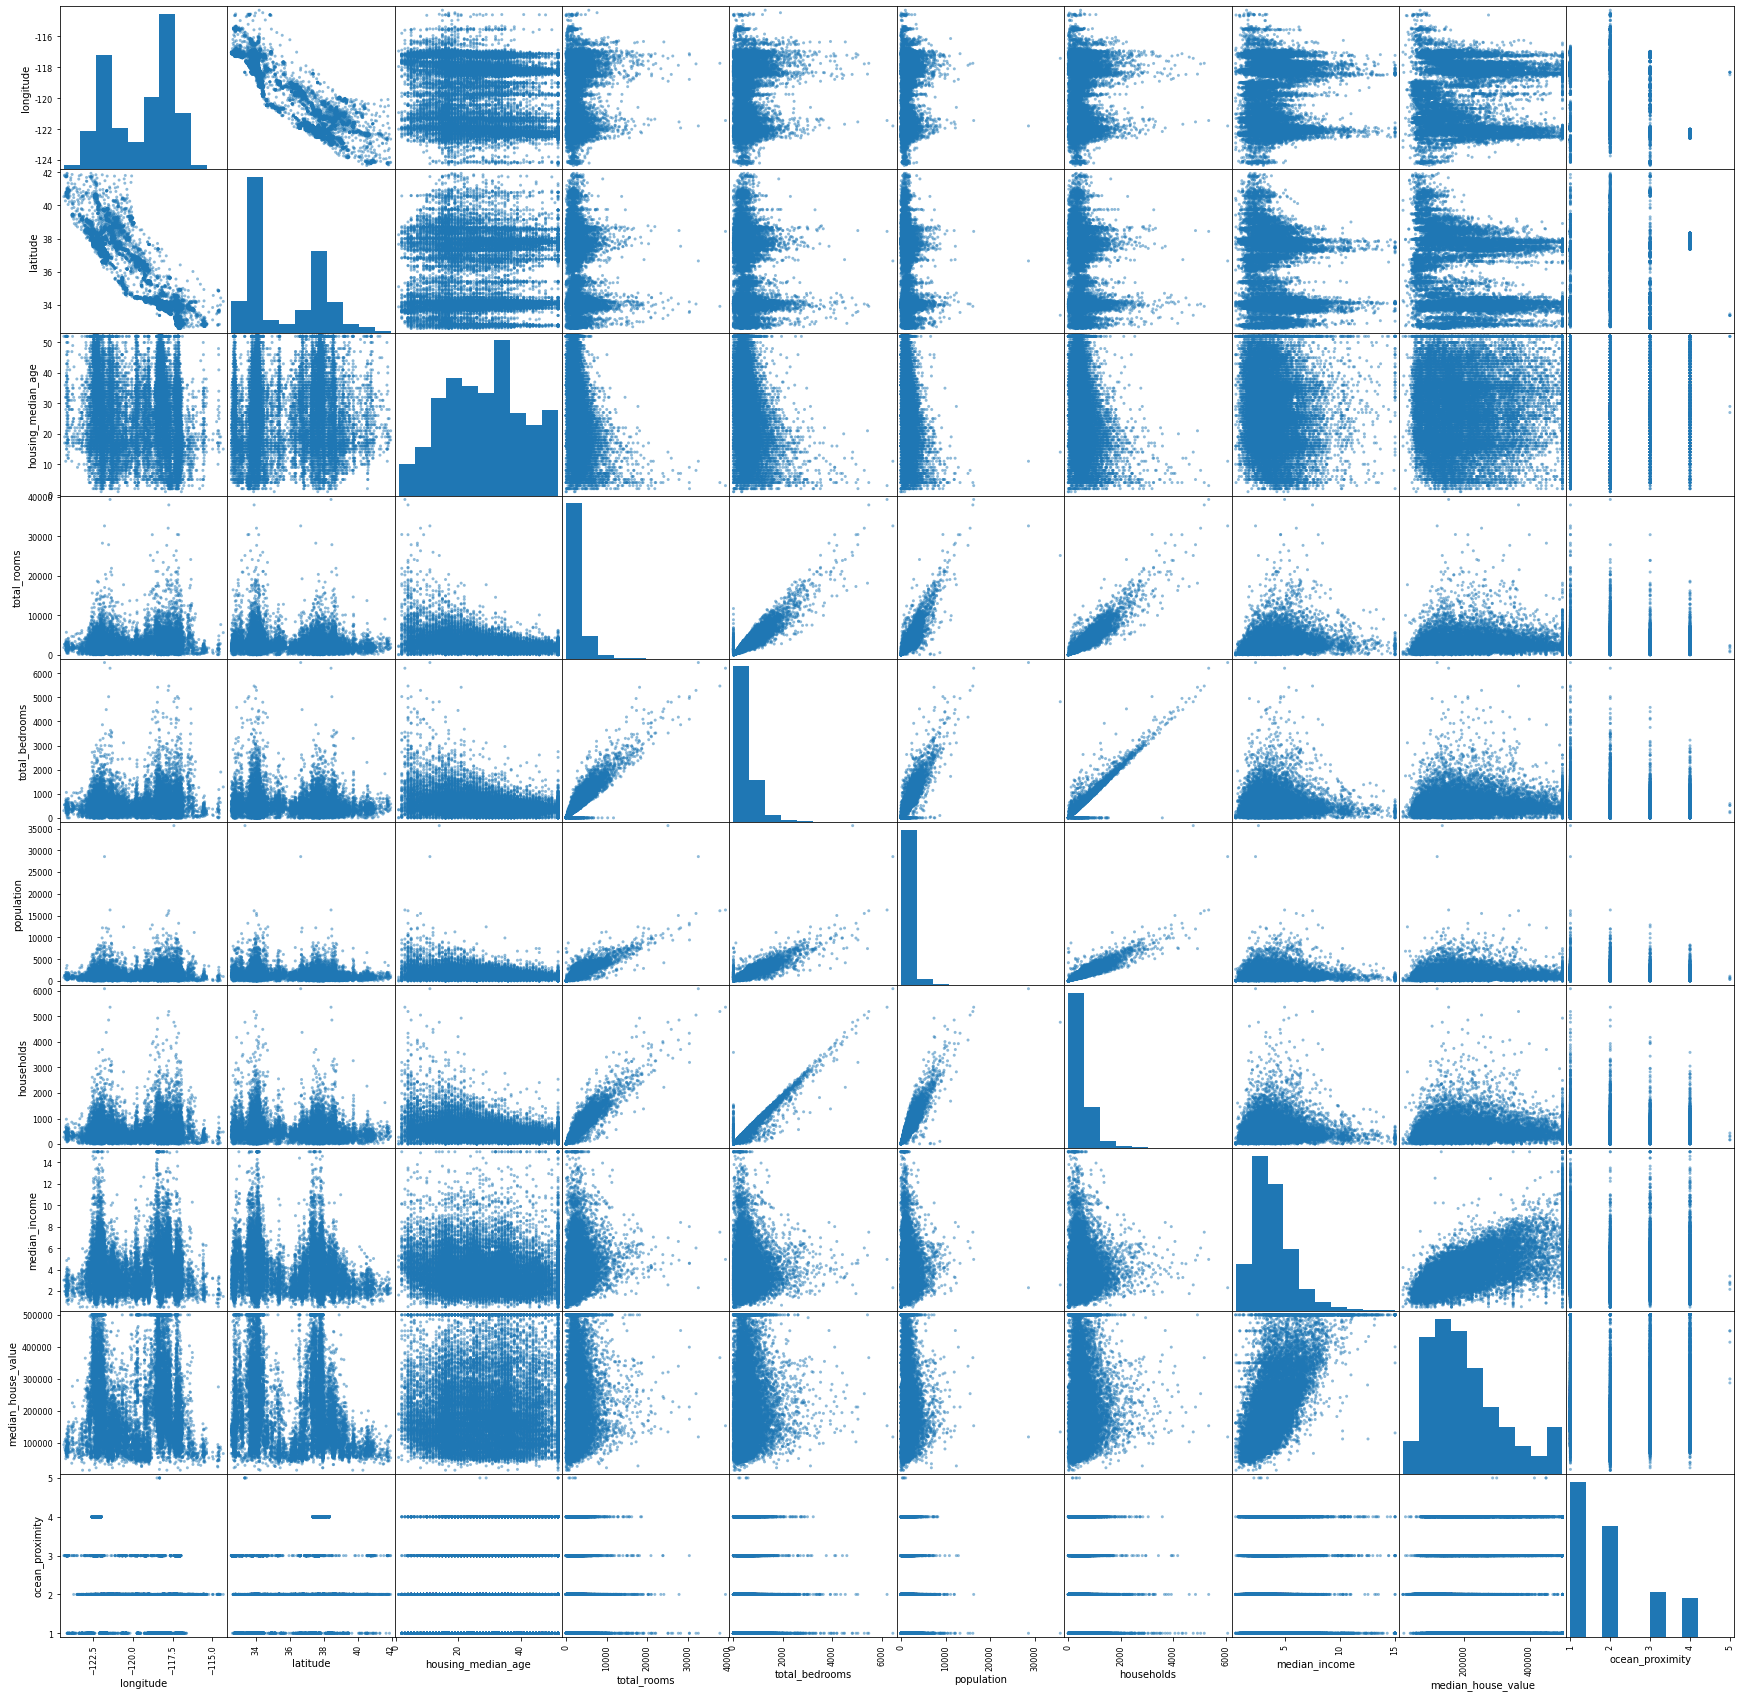

In [41]:
# хммм, мне кажется или признаки меду собой корелируют? давайте удостоверимся в этом
from pandas.plotting import scatter_matrix

_ = scatter_matrix(df, figsize=(30,30))

Разведочный анализ данных мы провели, теперь можно построить пайплайн обработки данных и обучить модель.

Для этого мы будем использовать "взрослую" библиотеку [sklearn](https://scikit-learn.org/stable/).

In [42]:
df = pd.read_table("https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv", sep=',')
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [43]:
# разбиваем данные на train и test
from sklearn.model_selection import train_test_split
tarin, test = train_test_split(df, shuffle=False, test_size=0.33)

Строим пайплайн обработки данных

In [44]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


features = tarin.drop("median_house_value", axis=1) 
target = tarin["median_house_value"].copy()

# задаем пайплайн для числовый признаков
# заполнение пропущенных значений и склалирование
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('std_scaler', StandardScaler()),
    ])


features_num = features.drop("ocean_proximity", axis=1)

num_attribs = list(features_num)
cat_attribs = ["ocean_proximity"]

# Задаем обработку датасета в зависмости от столбца
# для числовых колонок у нас будет применяться пайплайн заданный выше
# для категориальных признаков применяем Encoder
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

prepared_features = full_pipeline.fit_transform(features)
prepared_features

array([[-1.66287686,  1.2425768 ,  0.94055129, ...,  0.        ,
         1.        ,  0.        ],
       [-1.65737393,  1.23265395, -0.67734482, ...,  0.        ,
         1.        ,  0.        ],
       [-1.66837979,  1.22769252,  1.83039415, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 1.13261141, -0.44430814,  0.13160324, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.11610262, -0.44430814, -1.72897729, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.10509676, -0.44430814, -1.8098721 , ...,  0.        ,
         0.        ,  0.        ]])

Теперь мы вспомним, что говорили о [кроссвалидации](https://scikit-learn.org/stable/modules/cross_validation.html) и применим ее тут.

In [45]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

def display_scores(scores):
    print("RMSE scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

model = LinearRegression()
scores = cross_val_score(model, prepared_features, target,
                                scoring="neg_mean_squared_error", cv=5)

display_scores(np.sqrt(-scores))

RMSE scores: [67882.97681926 82004.04735833 64765.95039088 82377.33909428
 56689.41275221]
Mean: 70743.94528299231
Standard deviation: 10035.708230662362


Подбор параметров по сетке

In [46]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'fit_intercept': [True, False], 'normalize': [True, False]},
  ]

model = LinearRegression()
grid_search = GridSearchCV(model, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(prepared_features, target)

grid_search.best_params_

{'fit_intercept': True, 'normalize': False}

In [47]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

3.4127102965704092e+16 {'fit_intercept': True, 'normalize': True}
71452.23043330415 {'fit_intercept': True, 'normalize': False}
71733.32699264323 {'fit_intercept': False, 'normalize': True}
71733.32699264323 {'fit_intercept': False, 'normalize': False}


Финальное испытание модели

In [48]:
final_model = grid_search.best_estimator_

X_test = test.drop("median_house_value", axis=1)
y_test = test["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_model.coef_

array([-37057.03974216, -46806.48892553,   7865.44672468,  -6386.7220601 ,
        25687.20976647, -53241.21772643,  37565.43383773,  72374.02868356,
       -22161.50480611, -67514.27493798, 133578.26807966, -41990.27614876,
        -1912.21218681])

In [49]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

final_predictions = final_model.predict(X_test_prepared)

print(f"MSE => {mean_squared_error(y_test, final_predictions)}")
print(f"RMSE => {np.sqrt(mean_squared_error(y_test, final_predictions))}")
print(f"MAE => {mean_absolute_error(y_test, final_predictions)}")
print(f"MAPE => {MAPE(final_predictions, y_test)}")
print(f"R2 => {r2_score(y_test, final_predictions)}")

MSE => 6038383137.331543
RMSE => 77707.03402737452
MAE => 56877.95793762954
MAPE => 30.67440148205697
R2 => 0.5767021979146492


# Домашнее задание

1. Для моделей `LinearRegrsseion` и `LinearClassification`, описанных в начале ноутбука построить модели с различными методами оптимизации и регуляризации.
2. Улучшить результат модели.
3. Провести эксперементы с feature extraction, созданием новы фич и удалением фичей, найти наиболее важные призраки.
4. Применить регуляризацию.
5. Провести разведочный анализ данных и построение пайплайна обработки данных и модели на этом [датасете](https://raw.githubusercontent.com/Azure/carprice/master/dataset/carprice.csv) или же на [этом](https://www.kaggle.com/c/titanic).
6. Какие недочеты есть в текущем пайплайне и как его можно улучшить?

# Ссылки на литературу

- [Тык](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) - документация библитеки SkLearn по линейной регрессии.
- [Клик](https://www.ibm.com/ru-ru/analytics/learn/linear-regression) - Краткое описание модели линейной регрессии. Обзор от ibm.
- [Щелк](https://helpstat.ru/korrelyacziya-i-regressiya/) - кореляция + линейная регрессия. Чуть более подробная информация об этой теме.
- [Клац](http://statsoft.ru/home/textbook/modules/stgenlinmod.html) - чисто математическое описание от базовой регрессии до множественной регрессии и к линейным моделям общего вида. Хорошая математика, но нужно сильно углубиться в дискретный анализ и теорвер.
- [Пиньк](http://statistica.ru/theory/osnovy-lineynoy-regressii/) - тоже больше упор на математику, но тут описаны действия по шагам, что позволит понять как именно нужно выстраивать модель линейной регрессии, но тоже много теории и сложных терминов.
- [Клик](http://baguzin.ru/wp/prostaya-linejnaya-regressiya/) - хорошее применение математики с простыми объяснениями, но очень сильной базой.
- [Тык](http://neerc.ifmo.ru/wiki/index.php?title=%D0%9B%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D0%B0%D1%8F_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F) - ИТМО вики конспекты.
- [Щелк](http://www.machinelearning.ru/wiki/index.php?title=%D0%9B%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D1%8B%D0%B9_%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%82%D0%BE%D1%80) - Линейные классификаторы, теория.
- [Клик](https://nagornyy.me/en/courses/data-science/classification/) - примеры линейной классифкации на питоне.